In [1]:
%matplotlib inline

In [ ]:
# my imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing

from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures

import seaborn as sns

from sklearn.linear_model import LinearRegression, RANSACRegressor   

## Linear Regression

In [3]:
housing_data = fetch_california_housing()

In [4]:
housing_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [5]:
print(housing_data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [6]:
housing_df = fetch_california_housing(as_frame=True)

In [7]:
house_data = housing_df.frame

In [8]:
house_data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [9]:
house_data.dtypes

MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object

In [10]:
house_data.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [11]:
house_data.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
MedHouseVal,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


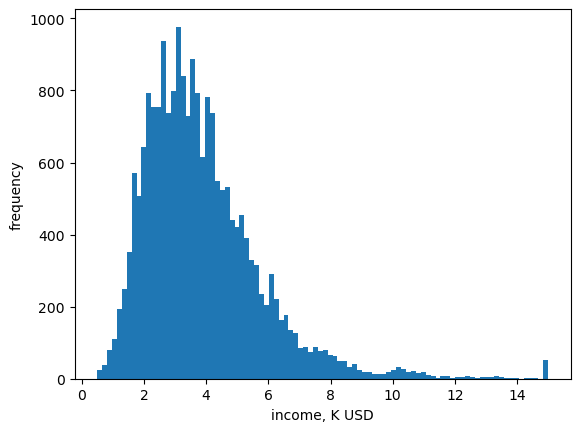

In [12]:
plt.hist(house_data.MedInc, bins='fd')
plt.xlabel('income, K USD')
plt.ylabel('frequency')
plt.show()

In [13]:
house_data[house_data.MedInc > 15]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
1566,15.0001,2.0,22.222222,2.222222,25.0,2.777778,37.74,-121.96,3.50000
4352,15.0001,37.0,8.659574,1.425532,100.0,2.127660,34.10,-118.37,5.00001
4604,15.0001,52.0,8.444954,1.100917,693.0,3.178899,34.06,-118.33,5.00001
4605,15.0001,52.0,8.483019,0.962264,813.0,3.067925,34.07,-118.33,5.00001
4606,15.0001,52.0,9.204969,1.062112,531.0,3.298137,34.07,-118.33,5.00001
4626,15.0001,52.0,7.958333,0.833333,457.0,3.808333,34.06,-118.32,5.00001
4678,15.0001,52.0,8.780612,0.994898,688.0,3.510204,34.08,-118.34,5.00001
5242,15.0001,32.0,8.002869,1.080344,1567.0,2.248207,34.11,-118.40,5.00001
5247,15.0001,36.0,9.368263,1.173653,862.0,2.580838,34.09,-118.44,5.00001
5248,15.0001,46.0,8.365591,0.967742,238.0,2.559140,34.08,-118.43,5.00001


In [14]:
house_data.shape

(20640, 9)

In [15]:
house_data.dropna().shape

(20640, 9)

In [16]:
house_data.drop_duplicates().shape

(20640, 9)

In [17]:
house_data_outliers = house_data[house_data.MedInc > 15]

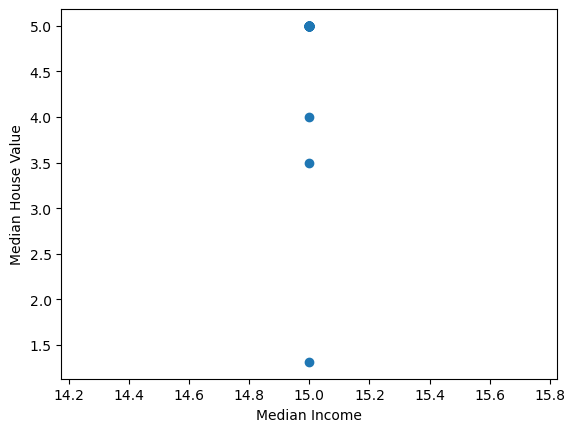

In [18]:
plt.scatter(house_data_outliers.MedInc, house_data_outliers.MedHouseVal)
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()

In [19]:
house_data.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


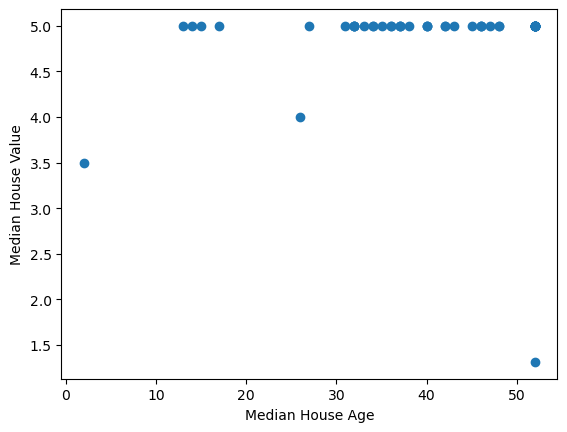

In [20]:
plt.scatter(house_data_outliers.HouseAge, house_data_outliers.MedHouseVal)
plt.xlabel('Median House Age')
plt.ylabel('Median House Value')
plt.show()

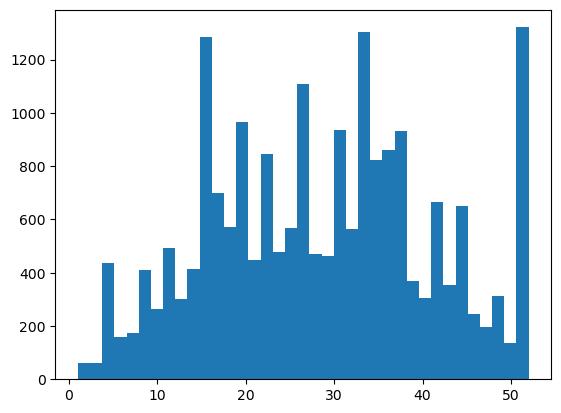

In [21]:
plt.hist(house_data.HouseAge, bins='fd')
plt.show()

In [22]:
house_data.HouseAge.sort_values().unique().tolist()

[1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0]

In [23]:
house_data.HouseAge.value_counts()

HouseAge
52.0    1273
36.0     862
35.0     824
16.0     771
17.0     698
34.0     689
26.0     619
33.0     615
18.0     570
25.0     566
32.0     565
37.0     537
15.0     512
19.0     502
27.0     488
24.0     478
30.0     476
28.0     471
20.0     465
29.0     461
31.0     458
23.0     448
21.0     446
14.0     412
22.0     399
38.0     394
39.0     369
42.0     368
44.0     356
43.0     353
40.0     304
13.0     302
41.0     296
45.0     294
10.0     264
11.0     254
46.0     245
5.0      244
12.0     238
8.0      206
9.0      205
47.0     198
4.0      191
48.0     177
7.0      175
6.0      160
50.0     136
49.0     134
3.0       62
2.0       58
51.0      48
1.0        4
Name: count, dtype: int64

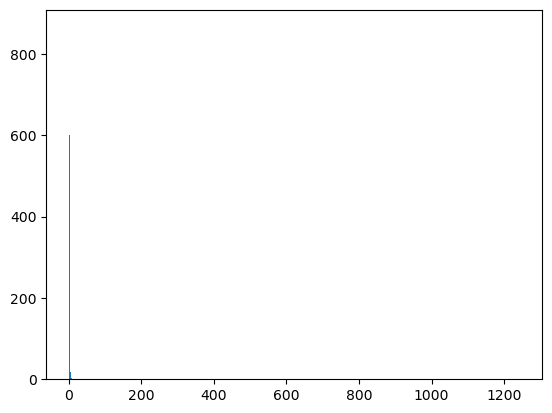

In [24]:
plt.hist(house_data.AveOccup, bins = 'fd')
plt.show()

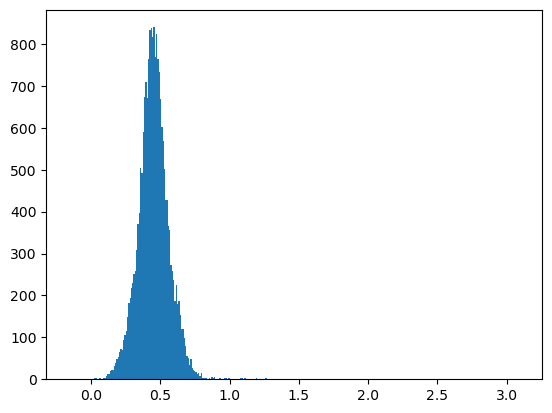

In [25]:
plt.hist(np.log10(house_data.AveOccup), bins = 'fd')
plt.show()

In [26]:
house_data[np.log10(house_data.AveOccup) > 1.5].sort_values('AveOccup')

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
13366,4.2578,36.0,5.258824,1.117647,2886.0,33.952941,33.94,-117.63,1.83300
8874,9.3370,52.0,7.285714,1.214286,1154.0,41.214286,34.06,-118.45,5.00001
16420,5.7485,26.0,5.366667,0.900000,1542.0,51.400000,37.89,-121.29,1.62500
12104,1.6250,8.0,7.600000,0.950000,1275.0,63.750000,33.97,-117.33,1.62500
9172,4.2391,5.0,5.123810,0.933333,8733.0,83.171429,34.47,-118.59,1.54600
13034,6.1359,52.0,8.275862,1.517241,6675.0,230.172414,38.69,-121.15,2.25000
16669,4.2639,46.0,9.076923,1.307692,6532.0,502.461538,35.32,-120.70,3.50000
3364,5.5179,36.0,5.142857,1.142857,4198.0,599.714286,40.41,-120.51,0.67500
19006,10.2264,45.0,3.166667,0.833333,7460.0,1243.333333,38.32,-121.98,1.37500


In [27]:
house_model = LinearRegression()

In [28]:
house_model.fit(house_data, house_data.MedHouseVal)

LinearRegression()

In [29]:
house_model.coef_

array([-4.72879866e-17, -1.22124533e-15, -2.37483644e-15,  5.66007744e-15,
        2.77555756e-17, -3.94649591e-17,  3.41306844e-16,  3.28946939e-16,
        1.00000000e+00])

In [30]:
house_model.feature_names_in_

array(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population',
       'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal'], dtype=object)

In [31]:
list(zip(house_model.feature_names_in_, house_model.coef_))

[('MedInc', -4.728798655776464e-17),
 ('HouseAge', -1.2212453270876722e-15),
 ('AveRooms', -2.374836438612249e-15),
 ('AveBedrms', 5.660077441460576e-15),
 ('Population', 2.7755575615628914e-17),
 ('AveOccup', -3.946495907847236e-17),
 ('Latitude', 3.413068438984368e-16),
 ('Longitude', 3.2894693913210205e-16),
 ('MedHouseVal', 1.0000000000000022)]

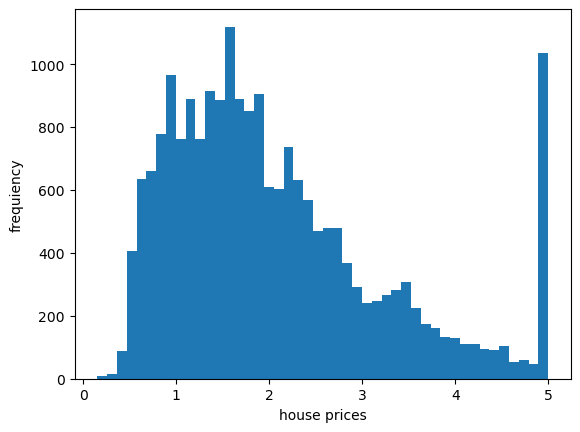

In [32]:
plt.hist(house_data.MedHouseVal, bins = 'fd')
plt.xlabel('house prices')
plt.ylabel('frequiency')
plt.show()

We notice that there are outliers with value just above 5 for houses with cost > $500 000 

In [33]:
house_data[house_data['MedHouseVal'] > 5].MedHouseVal.shape

(965,)

In [34]:
house_data[house_data['MedHouseVal'] > 5].MedHouseVal.unique()

array([5.00001])

We remove the outliers

In [35]:
house_data =  house_data[house_data['MedHouseVal'] <= 5]

Common mistake - leaving a target value in the attributes

We extract the target from the attributes

In [36]:
house_attributes = house_data.drop(columns= ['MedHouseVal'])
house_target = house_data['MedHouseVal']

Naively train our model:

In [37]:
house_model.fit(house_attributes, house_target)

LinearRegression()

In [38]:
list(zip(house_model.feature_names_in_, house_model.coef_))

[('MedInc', 0.4320399907515534),
 ('HouseAge', 0.008178957814135919),
 ('AveRooms', -0.11051221552018037),
 ('AveBedrms', 0.6134539079605484),
 ('Population', 4.593475896532903e-06),
 ('AveOccup', -0.0034477205518170955),
 ('Latitude', -0.37940337956504616),
 ('Longitude', -0.39590984689672465)]

In [39]:
house_model.predict(house_attributes.sample(3))

array([2.67347446, 1.96163039, 1.04085229])

Normalization

In [40]:
scaler = MinMaxScaler()

In [41]:
scaler.fit(house_data)

MinMaxScaler()

In [42]:
scaler.transform(house_data)

array([[0.53966842, 0.78431373, 0.04661026, ..., 0.5674814 , 0.21115538,
        0.90226824],
       [0.53802706, 0.39215686, 0.04094539, ..., 0.565356  , 0.21215139,
        0.70824802],
       [0.46602805, 1.        , 0.05651258, ..., 0.5642933 , 0.21015936,
        0.69505218],
       ...,
       [0.08276438, 0.31372549, 0.03310413, ..., 0.73219979, 0.31175299,
        0.15938318],
       [0.09429525, 0.33333333, 0.03404552, ..., 0.73219979, 0.30179283,
        0.14371311],
       [0.13025338, 0.29411765, 0.03347754, ..., 0.72582359, 0.30976096,
        0.15340381]])

In [43]:
house_attributes_scaled = scaler.fit_transform(house_attributes)

In [44]:
house_model_scaled = LinearRegression()

In [45]:
dir(house_model_scaled)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_set_intercept',
 '_validate_data',
 '_validate_params',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'n_jobs',
 'positive',
 'predict',
 'score',
 'set_params']

Target variable doesn't need to be scaled

In [46]:
house_model_scaled.fit(house_attributes_scaled, house_target)

LinearRegression()

In [47]:
dir(house_model_scaled)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_set_intercept',
 '_validate_data',
 '_validate_params',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_features_in_',
 'n_jobs',
 'positive',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

By eliminating the range significance (by normalization) we get better significance.

In [51]:
list(zip(house_model.feature_names_in_, house_model_scaled.coef_))

[('MedInc', 6.264666273895667),
 ('HouseAge', 0.41712684852093396),
 ('AveRooms', -14.553041960731745),
 ('AveBedrms', 20.69384516186914),
 ('Population', 0.16389062651231254),
 ('AveOccup', -4.284279002633838),
 ('Latitude', -3.570185801707085),
 ('Longitude', -3.9749348628431065)]

In [52]:
z_score = StandardScaler()

In [53]:
z_scored_attributes = z_score.fit_transform(house_attributes)

In [54]:
z_scored_model = LinearRegression()

In [55]:
z_scored_model.fit(z_scored_attributes, house_target)

LinearRegression()

In [57]:
dir(z_scored_model)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_set_intercept',
 '_validate_data',
 '_validate_params',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_features_in_',
 'n_jobs',
 'positive',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [58]:
list(zip(house_model.feature_names_in_, z_scored_model.coef_))

[('MedInc', 0.6784028909722356),
 ('HouseAge', 0.10230890631596967),
 ('AveRooms', -0.2533470347321315),
 ('AveBedrms', 0.27717527061724045),
 ('Population', 0.005253189350408739),
 ('AveOccup', -0.03665515422123439),
 ('Latitude', -0.8156213233862968),
 ('Longitude', -0.7942178625015107)]

With the current setup we can't score the models properly as we didn't make the test / train split

In [59]:
z_scored_model.score(z_scored_attributes, house_target)

0.5701011070331932

$R^2$

RANSAC (Random Sample Consensus) Regressor

In [61]:
ransac_model = RANSACRegressor()

In [62]:
ransac_model.fit(house_attributes_scaled, house_target)

RANSACRegressor()

In [65]:
ransac_model.estimator_.coef_

array([ 6.05637664e+00, -1.96654957e-01, -1.93406577e+01,  4.48206061e+01,
       -1.66333107e+00, -2.49653628e+02, -3.85582233e+00, -4.39908256e+00])

In [67]:
list(zip(house_model.feature_names_in_, ransac_model.estimator_.coef_))

[('MedInc', 6.056376635535709),
 ('HouseAge', -0.1966549573544233),
 ('AveRooms', -19.340657742034963),
 ('AveBedrms', 44.82060606036313),
 ('Population', -1.6633310739095664),
 ('AveOccup', -249.65362827939816),
 ('Latitude', -3.855822325318076),
 ('Longitude', -4.399082561694177)]

In [68]:
ransac_model.inlier_mask_

array([False,  True,  True, ...,  True,  True,  True])

In [69]:
ransac_model.inlier_mask_.sum()

13589

Inliears:

In [71]:
house_attributes[ransac_model.inlier_mask_]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26
...,...,...,...,...,...,...,...,...
20634,3.7125,28.0,6.779070,1.148256,1041.0,3.026163,39.27,-121.56
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


Outliers:

In [72]:
house_attributes[~ ransac_model.inlier_mask_]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25
...,...,...,...,...,...,...,...,...
20592,0.8928,52.0,4.442953,1.073826,520.0,3.489933,39.14,-121.58
20625,4.1250,37.0,7.285714,1.214286,29.0,2.071429,39.12,-121.52
20626,2.1667,36.0,6.573099,1.076023,504.0,2.947368,39.18,-121.43
20629,2.0943,28.0,5.519802,1.020902,6912.0,3.801980,39.12,-121.39


In [74]:
house_model.score(house_attributes, house_target)

0.5701011070331932

In [75]:
ransac_model.score(house_attributes_scaled, house_target)

-4.225281454532911

Negative score means that model that predicts mean value is better than that one.

In [76]:
ransac_model.score(house_attributes_scaled[ransac_model.inlier_mask_], house_target[ransac_model.inlier_mask_])

0.845758835519144

When we score the model on the data it knows we get much better score

From all parameters we can set for RANSAC residual threshold is one of the most important

In [77]:
new_ransac_model = RANSACRegressor(residual_treshold = 0.5)

In [78]:
new_ransac_model.fit(house_attributes_scaled, house_target)
new_ransac_model.inlier_mask_.sum() / len(house_attributes_scaled)

0.6813214739517154

In [80]:
new_ransac_model = RANSACRegressor(residual_threshold = 0.5)
new_ransac_model.fit(house_attributes_scaled, house_target)
new_ransac_model.inlier_mask_.sum() / len(house_attributes_scaled)

0.5109529860228716

In [81]:
new_ransac_model = RANSACRegressor(residual_threshold = 0.9)
new_ransac_model.fit(house_attributes_scaled, house_target)
new_ransac_model.inlier_mask_.sum() / len(house_attributes_scaled)

0.8422363405336721

In [82]:
new_ransac_model = RANSACRegressor(residual_threshold = 0.1)
new_ransac_model.fit(house_attributes_scaled, house_target)
new_ransac_model.inlier_mask_.sum() / len(house_attributes_scaled)

0.1103430749682338

visualy Comparing inliars with outliers

In [83]:
inlier_mask = ransac_model.inlier_mask_

In [91]:
inliers_house_age = house_attributes[inlier_mask].HouseAge
inliers_ave_rooms = house_attributes[inlier_mask].AveRooms
inliers_ave_value = house_target[inlier_mask]
outliers_house_age = house_attributes[~inlier_mask].HouseAge
outliers_ave_rooms = house_attributes[~inlier_mask].AveRooms
outliers_ave_value = house_target[~inlier_mask]


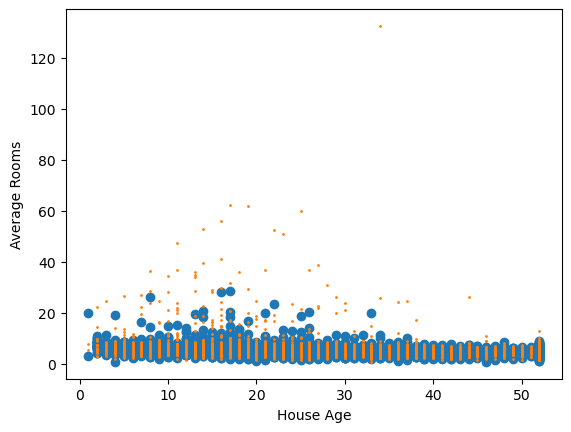

In [88]:
plt.scatter(inliers_house_age, inliers_ave_rooms)
plt.scatter(outliers_house_age, outliers_ave_rooms, s = 1)

plt.xlabel('House Age')
plt.ylabel('Average Rooms')
plt.show()

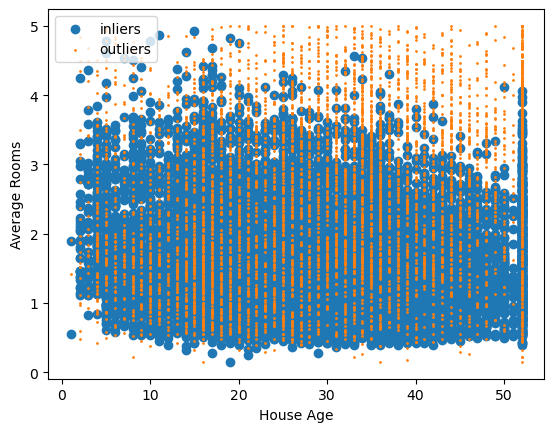

In [93]:
plt.scatter(inliers_house_age, inliers_ave_value, label = 'inliers')
plt.scatter(outliers_house_age, outliers_ave_value, s = 1, label = 'outliers')
plt.legend()
plt.xlabel('House Age')
plt.ylabel('Average Rooms')
plt.show()

Polinomial Regression - syntetical features
degree=


In [96]:
PolynomialFeatures(degree=3).fit_transform(house_attributes).shape

(19675, 165)

In [97]:
poly_features = PolynomialFeatures(degree=3)

In [98]:
poly_features.fit_transform(house_attributes).shape

(19675, 165)

In [99]:
poly_features

PolynomialFeatures(degree=3)

Curse of dimensionality

In [100]:
dir(poly_features)

['__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_feature_names',
 '_check_n_features',
 '_combinations',
 '_get_param_names',
 '_get_tags',
 '_max_degree',
 '_min_degree',
 '_more_tags',
 '_n_out_full',
 '_num_combinations',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_sklearn_auto_wrap_output_keys',
 '_validate_data',
 '_validate_params',
 'degree',
 'feature_names_in_',
 'fit',
 'fit_transform',
 'get_feature_names_out',
 'get_params',
 'include_bias',
 'interaction_only',
 'n_features_in_',
 'n_output_features_',
 'order',
 'powers_',
 'set_output',
 'set_params'

In [101]:
poly_features.get_feature_names_out()

array(['1', 'MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population',
       'AveOccup', 'Latitude', 'Longitude', 'MedInc^2', 'MedInc HouseAge',
       'MedInc AveRooms', 'MedInc AveBedrms', 'MedInc Population',
       'MedInc AveOccup', 'MedInc Latitude', 'MedInc Longitude',
       'HouseAge^2', 'HouseAge AveRooms', 'HouseAge AveBedrms',
       'HouseAge Population', 'HouseAge AveOccup', 'HouseAge Latitude',
       'HouseAge Longitude', 'AveRooms^2', 'AveRooms AveBedrms',
       'AveRooms Population', 'AveRooms AveOccup', 'AveRooms Latitude',
       'AveRooms Longitude', 'AveBedrms^2', 'AveBedrms Population',
       'AveBedrms AveOccup', 'AveBedrms Latitude', 'AveBedrms Longitude',
       'Population^2', 'Population AveOccup', 'Population Latitude',
       'Population Longitude', 'AveOccup^2', 'AveOccup Latitude',
       'AveOccup Longitude', 'Latitude^2', 'Latitude Longitude',
       'Longitude^2', 'MedInc^3', 'MedInc^2 HouseAge',
       'MedInc^2 AveRooms', 'MedInc^2 AveBedrms', 

In [106]:
poly_regression = LinearRegression()

In [104]:
poly_features_transformed = poly_features.transform(house_attributes_scaled)

c:\Users\Owner\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [109]:
poly_features_transformed.shape

(19675, 165)

In [110]:
poly_regression.fit(poly_features_transformed, house_target)

LinearRegression()

In [111]:
poly_regression.score(poly_features_transformed, house_target)

0.6998591049598406

Plus of Poly Regression - better model power
Minus - curse of dimensionality